<a href="https://colab.research.google.com/github/sungjea713/FMCW/blob/master/Radar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Radar

해야할일
<ul> - From choi
  <li>FMCW 신호 모델링</li>
  <li>TxRx 모델링</li>
  <li>Range Doppler 추정</li>
  <li>Range Resolution</li>
  <li>Doppler Resolution</li>
</ul>

<ul> -From Kim
  <li>(in-cabin) Test IWR6843(AOP모듈, RM68-P1), 3D Point들이 어떻게 감지되는지 1주일 ~ 7/17</li>
  <li>Passanger Detection</li>
  <li>Classification 성인/아기(Position Detection -> Demo Program)</li>
</ul>

용어

<ul> 
  <li>Clutter: 원하지 않는 목표물</li>
  <li>on Continuous Wave)</li>
</ul>
  
![대체 텍스트](http://www.emagtech.com/wiki/images/thumb/a/a8/SysTUT7_5.png/600px-SysTUT7_5.png)

![대체 텍스트](https://github.com/sungjea713/FMCW/blob/master/Images/Transmitter_DualChanel_Receiver.png?raw=true)


Transmitter Dual Channel(I/Q Channel) Receiver

기존 CW에서는 Transmit Wave와 Receive Wage 간 $f_B$(beat frequency)가 양수, 음수가 될 수 있으므로 I, Q 채널이 필요하다. $f_B$는 target range $R$과 radial velocity $v_R$에 동시에 영향을 받는다. 

 

$$f_{\tau}(1-v_r/c)=f_t(1+v_r/c)$$

$$f_{\tau}=f_t\frac{1+v_r/c}{1-v_r}$$

$$f_{\tau}=f_t\frac{c+v_r}{c-v_r}$$

$$f_D=f_{\tau}-f_t=f_t(\frac{c+v_r}{c-v_r}-1)=2v\frac{f_t}{c-v}\approx2v_r\frac{f_t}{c}=\frac{2}{\lambda}v_r(\because c\gg v)$$

![대체 텍스트](https://github.com/sungjea713/FMCW/blob/master/Images/FMCW.PNG?raw=true)

carrier frequency $f_0$로부터 시간 $\tau$가 흐르면 $f_R$만큼의 frequencey shifting이 일어나며 

$$f_B=f_R-f_D=-\frac{f_{sw}}{T_{chirp}}\frac{2}{c}R-\frac{2}{\lambda}v_r$$


기존 classical chirp sequence waveform은 verolity measurement에서 모호성을 가지는 문제가 있다.
(New Waveform based on a Chirp Sequence)



/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


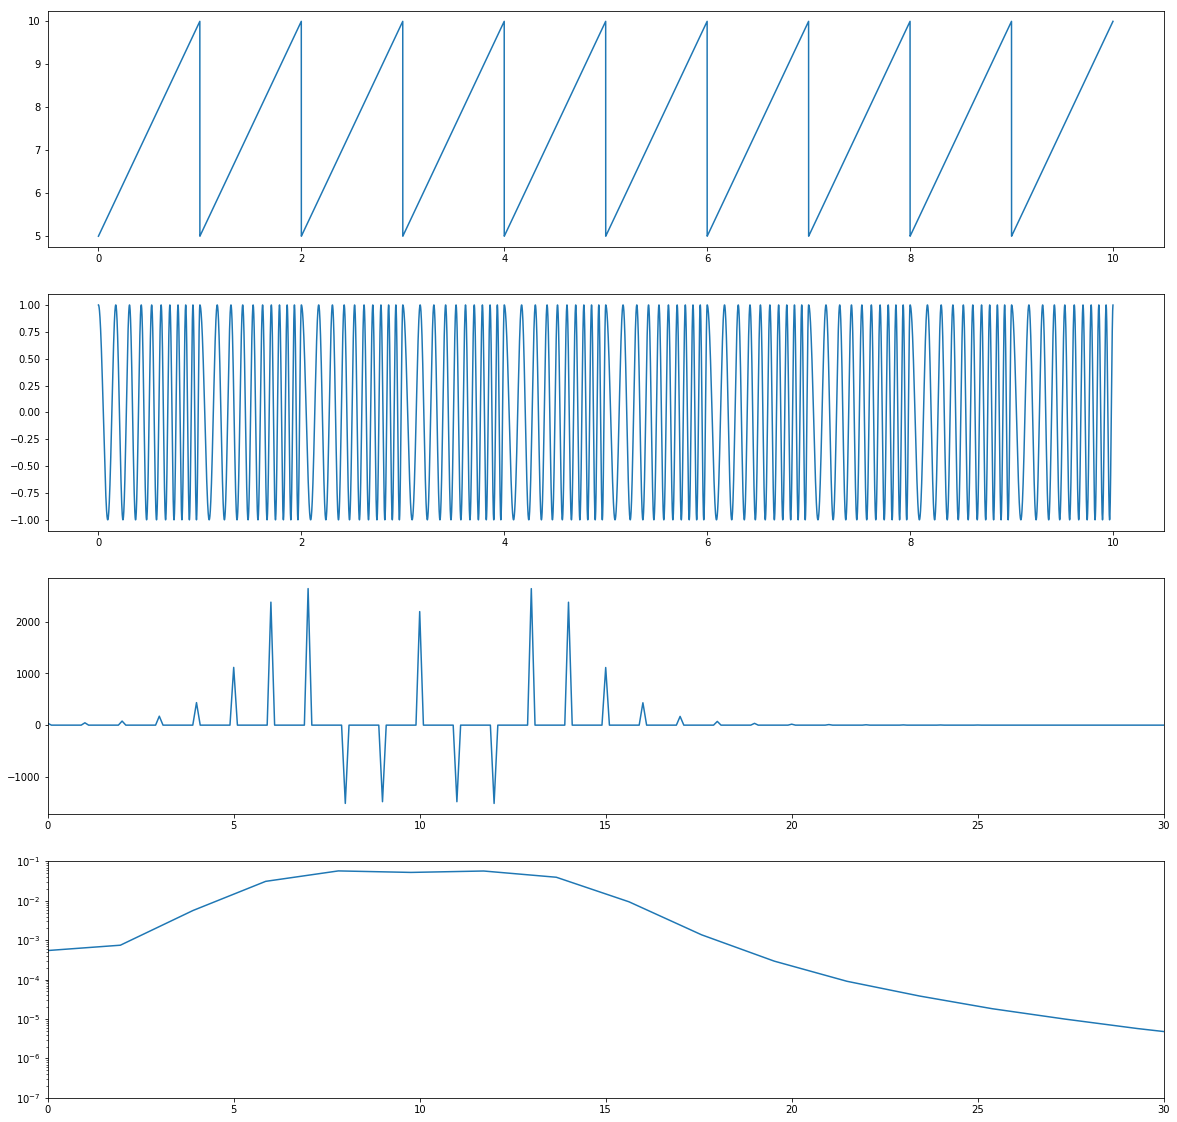

In [13]:
'''sawtooth'''
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift
from scipy import signal

Tchirp = 1
fsw = 5
f0 = 5
fs = 2000/Tchirp
t = [x for x in np.arange(0.0, 1, 1/fs)]
yf = [fsw*(signal.sawtooth(2*np.pi/Tchirp*x)+1)/2 + f0 for x in t]
yt = []
for i in range(0, len(yf)):
  yt.append(math.cos(2*math.pi*yf[i]*t[i]))

iter = 10

ytt = []
yff = []
for i in range(0, iter):
  for j in range(0, len(yt)):
    ytt.append(yt[j])
  for j in range(0, len(yf)):
    yff.append(yf[j])

tt = [x for x in np.arange(0.0, iter, 1/fs)]
    

yfft = fftshift(fft(ytt))
fx = [ x * fs /len(tt) for x in np.arange(-len(tt)/2, len(tt)/2)]

fp, Pxx_den = signal.welch(ytt, fs, nperseg=1024)

fig = plt.figure(figsize=(20,20))
ax0 = fig.add_subplot(4, 1, 1)
ax1 = fig.add_subplot(4, 1, 2)
ax2 = fig.add_subplot(4, 1, 3)
ax3 = fig.add_subplot(4, 1, 4)
ax0.plot(tt, yff)
ax1.plot(tt, ytt)
ax2.plot(fx, yfft)
ax2.set_xlim(0, 30)
ax3.semilogy(fp, Pxx_den)
ax3.set_ylim([1e-7, 1e-1])
ax3.set_xlim(0, 30)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


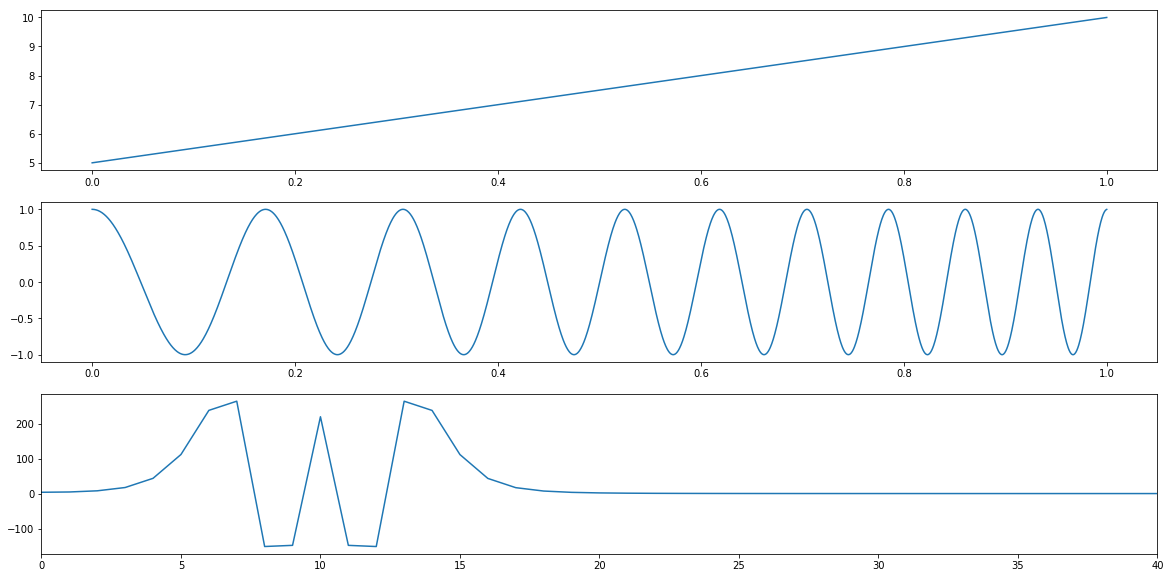

In [0]:
'''sawtooth'''
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift
from scipy import signal

Tchirp = 1
fsw = 5
f0 = 5
fs = 2000/Tchirp
t = [x for x in np.arange(0.0, 1, 1/fs)]
yf = [fsw*(signal.sawtooth(2*np.pi/Tchirp*x)+1)/2 + f0 for x in t]
yt = []
for i in range(0, len(yf)):
  yt.append(math.cos(2*math.pi*yf[i]*t[i]))

yfft = fftshift(fft(yt))
fx = [ x * fs /len(t) for x in np.arange(-len(t)/2, len(t)/2)]

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

ax1.plot(t, yf)
ax2.plot(t, yt)
ax3.plot(fx, yfft)
ax3.set_xlim(0, 40)

plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<function matplotlib.pyplot.show>

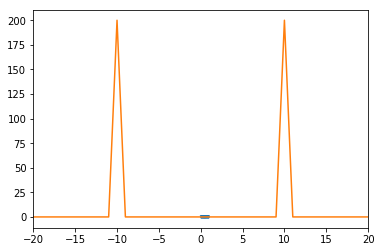

In [0]:
'''sinusoidal fft'''
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift

fc = 10
fs = 40*fc

t = [x for x in np.arange(0.0, 1.0, 1/fs)]
y = [math.cos(2*math.pi*fc*x) for x in t]

f = [ x * fs /len(t) for x in np.arange(-len(t)/2, len(t)/2)]

plt.plot(t,y)
yf = fftshift(fft(y))
len(yf)
plt.plot(f,yf)
plt.xlim(-20, 20)
plt.show





In [0]:
'''Time Delay'''
import time
for i in range(0, 10, 1):
  print(i)
  time.sleep(1)

0
1
2
3
4
5
6
7
8
9


In [0]:
'''Thread'''
import threading
import time

def worker(msg):
  print("{} is start {}" .format(threading.currentThread().getName(), msg))
  time.sleep(2)
  print("{} is end".format(threading.currentThread().getName()))

def main():
  for i in range(10):
    msg = "hello {}".format(i)
    th = threading.Thread(target=worker, name="[th def {}]".format(i), args=(msg))
    th.start



In [0]:
import threading
import time


def worker(msg):
    print("{} is start : {}".format(threading.currentThread().getName(), msg))
    time.sleep(5)
    print("{} is end".format(threading.currentThread().getName()))


def main():
    for i in range(10):
        msg = "hello {}".format(i)
        th = threading.Thread(target=worker, name="[th def {}]".format(i), args=(msg,))
        th.start()  # 위에서 생성한 쓰레드를 시작한다


if __name__ == "__main__":
    main()

Hi
Hi2
HiHi

[th def 0] is start : hello 0
[th def 1] is start : hello 1
[th def 2] is start : hello 2
[th def 3] is start : hello 3
[th def 4] is start : hello 4[th def 5] is start : hello 5

[th def 7] is start : hello 7[th def 8] is start : hello 8

[th def 6] is start : hello 6
[th def 9] is start : hello 9


In [0]:
import threading
import time

def worker():
  while 1:
    print("Hi")
    time.sleep(1)

def worker2():
  while 1:
    print("Hi2")
    time.sleep(2)
    
th = threading.Thread(target=worker)





Hi
Hi2
Hi
Hi


In [0]:
import threading
import time

def worker(i):
  while 1:
    print("Hi")
    i+=1
    print("{}".format(i))
    time.sleep(1)
i = 0
th = threading.Thread(target=worker, args=(i,))
th.start()

Hi
1


In [0]:
print("why")


why
Hi
613
